In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
data=pd.read_csv("Salary_Data.csv")

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
X=data['YearsExperience'].values 
y=data['Salary'].values  

In [8]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [9]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

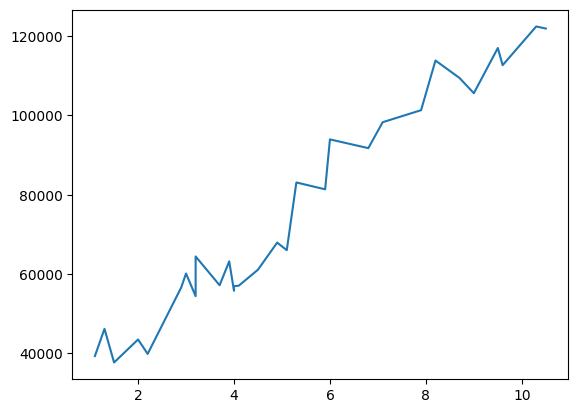

In [10]:
plt.plot(X,y)

In [12]:
X=np.array(X)
y=np.array(y)
X,y

(array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
         4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
         7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]),
 array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
         64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
         66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
        109431, 105582, 116969, 112635, 122391, 121872]))

In [13]:
def mean(X):
    return np.sum(X)/len(X)

In [18]:
def variance(X):
    mean_value=mean(X)
    return np.sum((X-mean_value)**2)/len(X)

In [19]:
def norm(X):
    mean_value=mean(X)
    variance_value=variance(X)
    return (X-mean_value)/np.sqrt(variance_value)

In [20]:
X_norm= norm(X)

In [21]:
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

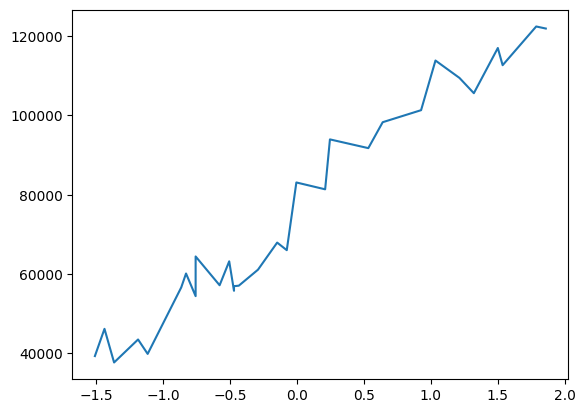

In [24]:
plt.plot(X_norm,y)

In [27]:
import random

In [47]:
class simple_LinReg:
    def __init__(self,lr=0.1,max_iter=2000,threshold=1e-6):
        self.lr=lr
        self.max_iter=max_iter
        self.threshold=threshold
        self.weight=random.uniform(-1,1)
        self.bias=random.uniform(-1,1)
    
    def predict(self,X):
        return self.weight*X + self.bias
    def fit(self,X,y):
        n=len(X)
        loss_history=[]
        y_pred = self.predict(X)
        errors = y-y_pred
        prev_loss=(1/(2*n))*np.sum(errors**2)
        for i in range(self.max_iter):
            w_grad = (1/n)*np.sum(errors*X)
            b_grad = (1/n)*np.sum(errors)
            self.weight += self.lr * w_grad
            self.bias += self.lr *b_grad
            y_pred=self.predict(X)
            errors=y-y_pred 
            curr_loss = (1/(2*n))*np.sum(errors**2)
            if np.abs(curr_loss-prev_loss)<self.threshold:
                break
            loss_history.append(curr_loss)
        return loss_history
    def plot(self,X,y):
        y_pred= self.predict(X)
        plt.plot(X,y)
        plt.plot(X,y_pred)

In [48]:
model=simple_LinReg()

In [49]:
loss_history=model.fit(X_norm,y)

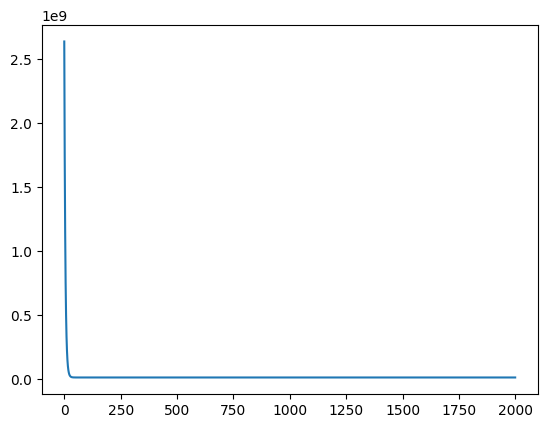

In [50]:
plt.plot(loss_history)

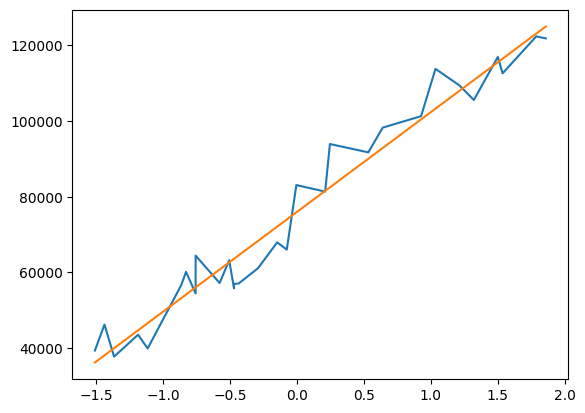

In [51]:
model.plot(X_norm,y)